In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
stk_data = yf.download("RELIANCE.NS", start="2013-06-01", end="2022-02-11")
stk_data

C:\Users\admin\AppData\Local\Temp\ipykernel_10056\4010520275.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2013-06-01", end="2022-02-11")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2013-06-03,167.620483,171.332848,167.056701,170.981818,14165128
2013-06-04,165.982346,170.152124,165.758971,168.194884,14752690
2013-06-05,170.620132,171.109442,166.046140,166.046140,12748842
2013-06-06,168.492706,171.024351,167.663017,170.194661,17113393
2013-06-07,166.705673,170.620152,166.152542,168.960745,9420701
...,...,...,...,...,...
2022-02-04,1065.006104,1072.840798,1060.346467,1069.437362,11061241
2022-02-07,1058.519165,1076.655277,1052.991451,1069.894201,10714467


In [5]:
column =  stk_data[['Close']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data= Ms.fit_transform(column)
print("Len:",data.shape)

Len: (2144, 1)


In [10]:
# Convert back to DataFrame for indexing
scaled_column = pd.DataFrame(data, index=column.index, columns=['Close'])

In [12]:
scaled_column

,Close
Date,
2013-06-03,0.001514
2013-06-04,0.000000
2013-06-05,0.004286
2013-06-06,0.002320
2013-06-07,0.000669
...,...
2022-02-04,0.830886
2022-02-07,0.824890
2022-02-08,0.841335


In [14]:
training_size =  round(len(data ) * 0.80)
print(training_size)
X_train=data[:training_size]
X_test=data[training_size:] 
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data[:training_size]
y_test=data[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1715
X_train length: (1715, 1)
X_test length: (429, 1)
y_train length: (1715, 1)
y_test length: (429, 1)


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


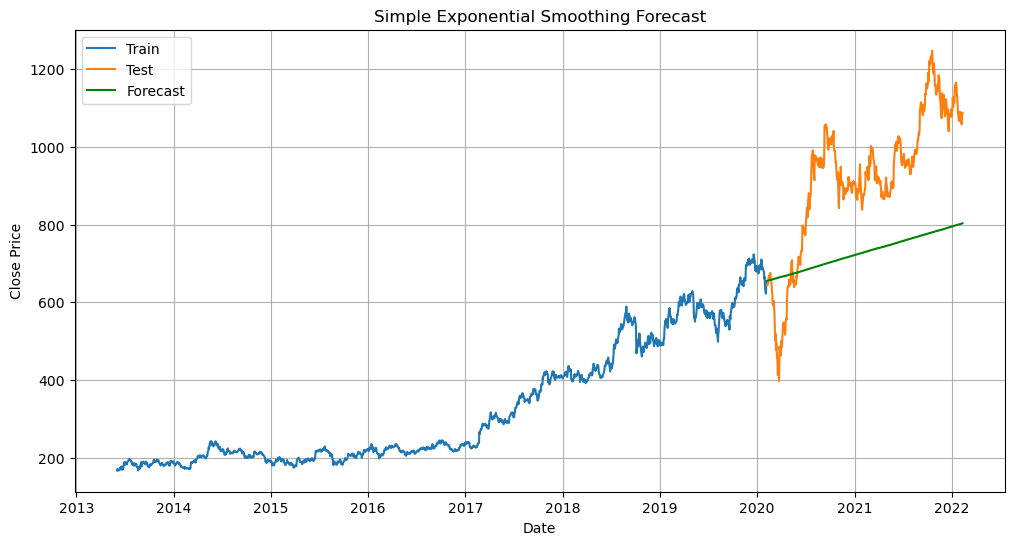

In [77]:

train = scaled_column[:-500]  # training all except last 500
test = scaled_column[-500:]   

# Apply Holt-Winters (HWES)
model = ExponentialSmoothing(train['Close'], trend="add", seasonal=None)
model_fit = model.fit()

# Forecast
forecast_scaled = model_fit.forecast(steps=500)

# Inverse Transform
train_inv = Ms.inverse_transform(train)
test_inv = Ms.inverse_transform(test)
forecast_inv = Ms.inverse_transform(forecast_scaled.values.reshape(-1, 1))

# Create new future dates for forecast
#last_date = test.index[-1]
#forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=500)

# Plot all
plt.figure(figsize=(12, 6))
plt.plot(train.index, train_inv, label='Train')
plt.plot(test.index, test_inv, label='Test')
plt.plot(test.index, forecast_inv, label='Forecast', color='green')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
forecast_inv

array([[655.03343533],
       [655.33058716],
       [655.62773899],
       [655.92489082],
       [656.22204265],
       [656.51919448],
       [656.81634631],
       [657.11349814],
       [657.41064997],
       [657.7078018 ],
       [658.00495363],
       [658.30210546],
       [658.59925729],
       [658.89640912],
       [659.19356095],
       [659.49071278],
       [659.78786461],
       [660.08501644],
       [660.38216827],
       [660.6793201 ],
       [660.97647193],
       [661.27362376],
       [661.57077559],
       [661.86792743],
       [662.16507926],
       [662.46223109],
       [662.75938292],
       [663.05653475],
       [663.35368658],
       [663.65083841],
       [663.94799024],
       [664.24514207],
       [664.5422939 ],
       [664.83944573],
       [665.13659756],
       [665.43374939],
       [665.73090122],
       [666.02805305],
       [666.32520488],
       [666.62235671],
       [666.91950854],
       [667.21666037],
       [667.5138122 ],
       [667